<a href="https://colab.research.google.com/github/KoheiMinoda/Numeracal_calculation/blob/main/Numerical_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def euler(k, n, tmax, h, a0, b0):
  t, a, b = 0.0, a0, b0
  tt, aa, bb = [], [], []
  while t <= tmax:
    tt.append(t)
    aa.append(a)
    bb.append(b)

    t += h
    v = k*a**n
    a -= v*h
    b += v*h

  tt = np.array(tt)
  aa = np.array(aa)
  bb = np.array(bb)

  return tt, aa, bb

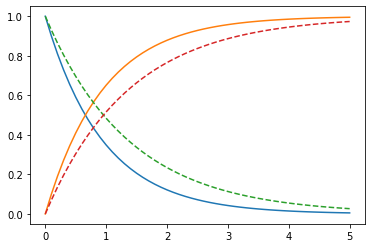

In [ ]:
import matplotlib.pyplot as plt

k, n = 1.0, 1
tmax, h = 5.0, 0.1
a0 , b0 = 1.0, 0.0
tt, aa, bb = euler(k, n, tmax, h, a0, b0)

plt.plot(tt, aa)
plt.plot(tt, bb)
#plt.plot(tt, aa + bb, '--')

k = 0.7
tt, aa, bb = euler(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, '--')
plt.plot(tt, bb, '--')
#plt.plot(tt, aa + bb, '--')

plt.show()

In [ ]:
def rk2(k, n, tmax, h, a0, b0):
  t, a, b = 0.0, a0, b0
  tt, aa, bb = [], [], []
  while t<= tmax:
    tt.append(t)
    aa.append(a)
    bb.append(b)

    t += h
    s1 = k*a**n
    s2 = k*(a - s1*h/2)**n
    v = (s1 + s2)/2
    a -= v*h
    b += v*h
  return map(np.array, [tt, aa, bb]) 

In [ ]:
def rk4(k, n, tmax, h, a0, b0):
  t, a, b = 0.0, a0, b0
  tt, aa, bb = [], [], []
  while t<= tmax:
    tt.append(t)
    aa.append(a)
    bb.append(b)

    t += h
    s1 = k*a**n
    s2 = k*(a - s1*h/2)**n
    s3 = k*(a - s2*h/2)**n
    s4 = k*(a - s3*h)**n

    v = (s1 + 2*s2 + 2*s3 + s4)/6
    a -= v*h
    b += v*h
  return map(np.array, [tt, aa, bb]) 

Enter h:0.1


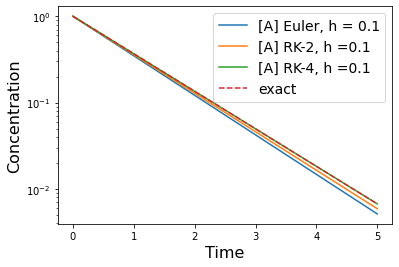

In [ ]:
k, n = 1.0, 1
tmax = 5.0
a0 , b0 = 1.0, 0.0

h = float(input('Enter h:'))

tt, aa, bb = euler(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, label = f'[A] Euler, h = {h}')

tt, aa, bb = rk2(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, label = f'[A] RK-2, h ={h}')

tt, aa, bb = rk4(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, label = f'[A] RK-4, h ={h}')

plt.plot(tt, a0*np.exp(-k*tt), '--', label = 'exact')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Concentration', fontsize = 16)
plt.legend(fontsize=14)
plt.yscale('log')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def adams_bashforth(tmax, f_i1, f_i, v0, h):
  t, v = 0.0, v0
  tt, vv = [], []
  v_i1, v_i = v, v

  while t <= tmax:
    tt.append(t)
    vv.append(v)

    f_i = - v_i
    f_i1 = - v_i1
    v = v + (h/2.0)*(3.0*f_i - f_i1)
    v_i1 = v_i
    v_i = v
    t += h
  return map(np.array, [tt, vv])

Enter h:0.1


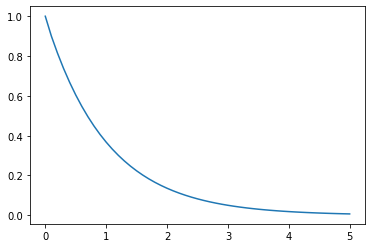

In [ ]:
tmax = 5.0
f_i1, f_i=1.0, 1.0
v0 = 1.0
h = float(input('Enter h:'))
tt, vv = adams_bashforth(tmax, f_i1, f_i, v0, h)
plt.plot(tt, vv)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def adams_moulton(tmax, f_1, f_i, v0, h):
  t, v = 0.0, v0
  tt, vv = [0.0], [v0]
  v_1, v_i = v, v

  while t <= tmax:
    tt.append(t)
    vv.append(v)

    f_1 = - v_1
    f_i = - v_i
    v = v + (h/2.0)*(f_1 + f_i)
    v_i = v_1
    v_1 = v
    t += h
  return map(np.array, [tt, vv])

Enter h:0.1


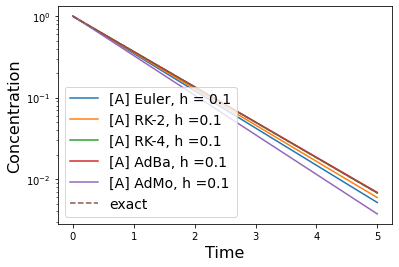

In [ ]:
k, n = 1.0, 1
tmax = 5.0
a0 , b0 = 1.0, 0.0
f_i1, f_i, f_1=1.0, 1.0, 1.0
v0 = 1.0

h = float(input('Enter h:'))

tt, aa, bb = euler(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, label = f'[A] Euler, h = {h}')

tt, aa, bb = rk2(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, label = f'[A] RK-2, h ={h}')

tt, aa, bb = rk4(k, n, tmax, h, a0, b0)
plt.plot(tt, aa, label = f'[A] RK-4, h ={h}')

tt, vv = adams_bashforth(tmax, f_i1, f_i, v0, h)
plt.plot(tt, vv, label = f'[A] AdBa, h ={h}')

tt, vv = adams_moulton(tmax, f_1, f_i, v0, h)
plt.plot(tt, vv, label = f'[A] AdMo, h ={h}')

plt.plot(tt, a0*np.exp(-k*tt), '--', label = 'exact')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Concentration', fontsize = 16)
plt.legend(fontsize=14)
plt.yscale('log')
plt.show()